# Ergast Developer API

In [6]:

import pandas as pd
import numpy as np
import requests


In [7]:
year_start= 1950
year_finish= 2022

## Drivers

In [8]:
drivers = {'driverId': [],
            'permanentNumber': [],
            'givenName': [],
            'familyName': [],
            'dateOfBirth': [],
            'nationality': [],
            'url': []
            }

for year in list(range(year_start,year_finish)):
    url = 'http://ergast.com/api/f1/{}/drivers.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['DriverTable']['Drivers']:
        if (item['driverId'] not in drivers['driverId']):
            try:
                drivers['driverId'].append(item['driverId'])
            except:
                drivers['driverId'].append(None)

            try:
                drivers['permanentNumber'].append(int(item['permanentNumber']))
            except:
                drivers['permanentNumber'].append(None)

            try:
                drivers['givenName'].append(item['givenName'])
            except:
                drivers['givenName'].append(None)

            try:
                drivers['familyName'].append(item['familyName'])
            except:
                drivers['familyName'].append(None)

            try:
                drivers['dateOfBirth'].append(item['dateOfBirth'])
            except:
                drivers['dateOfBirth'].append(None)

            try:
                drivers['nationality'].append(item['nationality'])
            except:
                drivers['nationality'].append(None)
            
            try:
                drivers['url'].append(item['url'])
            except:
                drivers['url'].append(None)
        
drivers = pd.DataFrame(drivers)


In [9]:
drivers

,driverId,permanentNumber,givenName,familyName,dateOfBirth,nationality,url
0,ader,NaN,Walt,Ader,1913-12-15,American,http://en.wikipedia.org/wiki/Walt_Ader
1,agabashian,NaN,Fred,Agabashian,1913-08-21,American,http://en.wikipedia.org/wiki/Fred_Agabashian
2,ascari,NaN,Alberto,Ascari,1918-07-13,Italian,http://en.wikipedia.org/wiki/Alberto_Ascari
3,banks,NaN,Henry,Banks,1913-06-14,American,http://en.wikipedia.org/wiki/Henry_Banks
4,bettenhausen,NaN,Tony,Bettenhausen,1916-09-12,American,http://en.wikipedia.org/wiki/Tony_Bettenhausen
...,...,...,...,...,...,...,...
535,pietro_fittipaldi,51.0,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
536,latifi,6.0,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi
537,mazepin,9.0,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
538,mick_schumacher,47.0,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


## Constructors

# FastF1

In [10]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

# Enable the cache
fastf1.Cache.enable_cache('cache') 

pd.options.mode.chained_assignment = None


In [11]:
fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()

fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Library/Frameworks/Python

DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

In [ ]:
session = fastf1.get_session(2022, 'Monza', 'R')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype inste

In [ ]:
colormap = mpl.cm.plasma

lap = session.laps.pick_driver('LEC').pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

In [ ]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

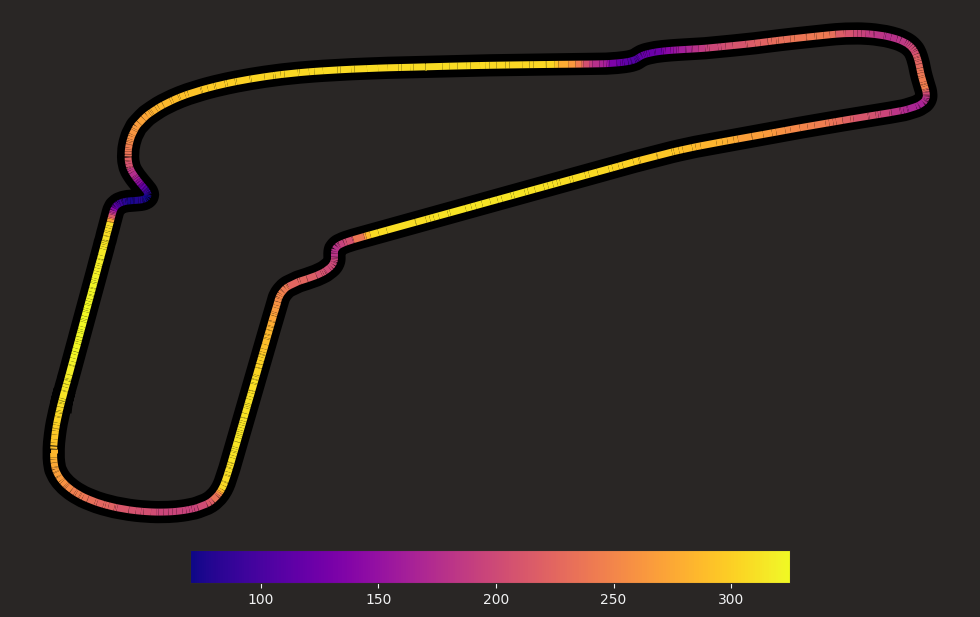

In [ ]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()